In [29]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import keras
import joblib
import IPython.display as ipd

In [22]:
# Load the trained model
model = keras.models.load_model('guitar_chord_recognition_model.keras')
print("Model loaded successfully.")

# Load the encoder and scaler
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')
print("Encoder and scaler loaded successfully.")

Model loaded successfully.
Encoder and scaler loaded successfully.


In [24]:
# Load the song intro
audio_path = r'C:\Users\CJHx6\OneDrive\AI_Class\GIT\Group_3_Project\notebooks\corey_exploration\audio\music\Guns N Roses-Sweet Child O Mine Intro.wav'
y, sr = librosa.load(audio_path, sr=None)

In [34]:
ipd.Audio(audio_path)

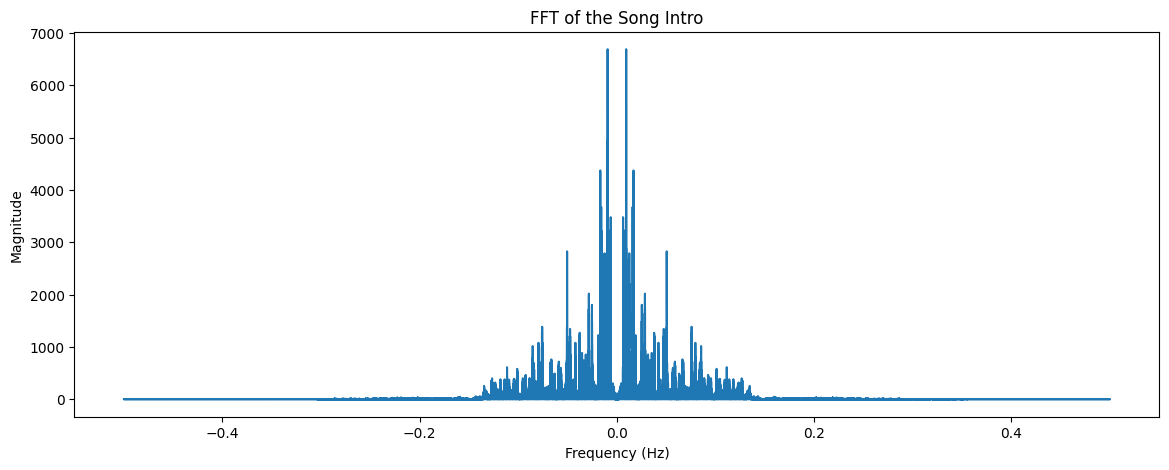

In [36]:
# Apply FFT
fft_result = np.fft.fft(y)
fft_freqs = np.fft.fftfreq(len(fft_result))

# Plot FFT
plt.figure(figsize=(14, 5))
plt.plot(fft_freqs, np.abs(fft_result))
plt.title('FFT of the Song Intro')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

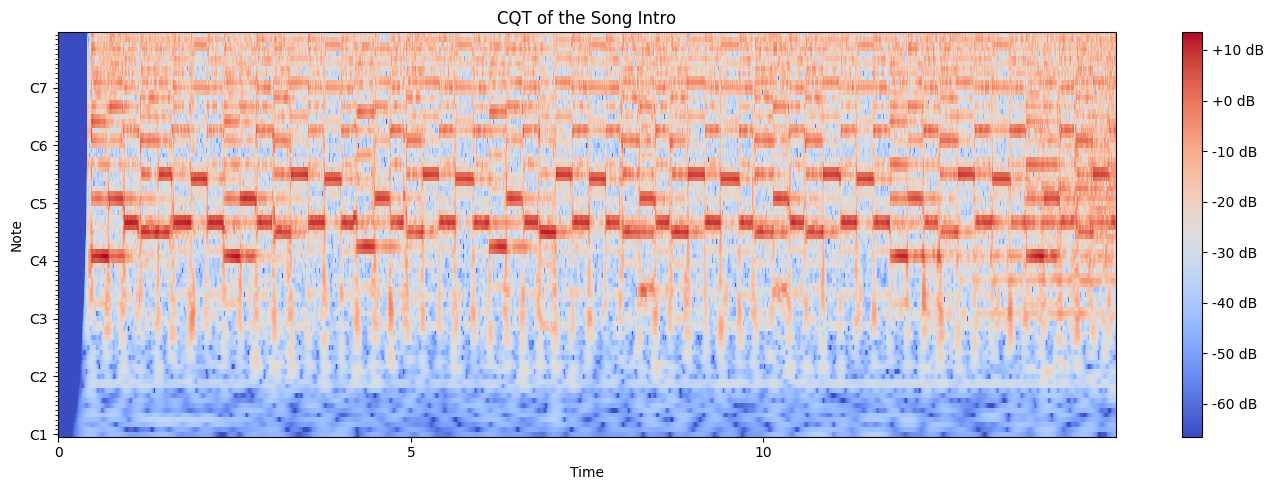

In [38]:
# Apply CQT
cqt_result = librosa.cqt(y, sr=sr)
cqt_db = librosa.amplitude_to_db(np.abs(cqt_result))

# Plot CQT
plt.figure(figsize=(14, 5))
librosa.display.specshow(cqt_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('CQT of the Song Intro')
plt.tight_layout()
plt.show()

In [40]:
# Segment the audio
segment_length = 16000  # 1-second segments at 16kHz
segments = [y[i:i + segment_length] for i in range(0, len(y), segment_length)]

In [44]:
# Define the mapping from chord numbers to chord names
chord_mapping = {
    0: 'A',
    1: 'A#',
    2: 'B',
    3: 'C',
    4: 'C#',
    5: 'D',
    6: 'D#',
    7: 'E',
    8: 'F',
    9: 'F#',
    10: 'G',
    11: 'G#',
    12: 'Am',
    13: 'A#m',
    14: 'Bm',
    15: 'Cm',
    16: 'C#m',
    17: 'Dm',
    18: 'D#m',
    19: 'Em',
    20: 'Fm',
    21: 'F#m',
    22: 'Gm',
    23: 'G#m',
    24: 'A7',
    25: 'A#7',
    26: 'B7',
    27: 'C7',
    28: 'C#7',
    29: 'D7',
    30: 'D#7',
    31: 'E7',
    32: 'F7',
    33: 'F#7',
    34: 'G7',
    35: 'G#7'
}

# Predict chords for each segment
for i, segment in enumerate(segments):
    # Ensure segment is of correct length
    if len(segment) < segment_length:
        segment = np.pad(segment, (0, max(0, segment_length - len(segment))), mode='constant')

    # Expand dimensions to match input shape (batch_size, steps, channels)
    segment = np.expand_dims(segment, axis=-1)  # Add channel dimension
    segment = np.expand_dims(segment, axis=0)  # Add batch dimension

    # Predict the chord
    prediction = model.predict(segment)
    predicted_chord = np.argmax(prediction)

    # Decode the predicted chord number to chord name
    chord_name = chord_mapping[predicted_chord]

    # Print the predicted chord name
    print(f'Segment {i+1}: Predicted Chord: {chord_name}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Segment 1: Predicted Chord: F7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Segment 2: Predicted Chord: F#7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Segment 3: Predicted Chord: G#
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Segment 4: Predicted Chord: F#7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Segment 5: Predicted Chord: A#m
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Segment 6: Predicted Chord: G#
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Segment 7: Predicted Chord: F#7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Segment 8: Predicted Chord: G#
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Segment 9: Predicted Chord: C#m
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Segment 10: Predicted Chord: G#
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Segment 11: Predicted Chord: G#
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Segment 12: Predicted Chord: G#
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Segment 13: Predicted Chord: Dm
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Segment 14: Predicted Chord: G#
1/1 ━━━━━━━━━━━━━━━━━━━━